# Data generation for creating genAI about activity recommendation for people with heart disesase.
BersamaPulse - Healthkathon BPJS 2024

In [1]:
import pandas as pd
import random

In [3]:
# Constants for dataset
NUM_DATA = 40000

In [4]:
BMI_CATEGORIES = ['Underweight', 'Normal', 'Overweight', 'Obese']
HEART_CONDITIONS = ['Stable CAD', 'Controlled Arrhythmia', 'Mild Pulmonary Hypertension']
GENDERS = ['Male', 'Female']
PREFERENCES = ['Outdoor', 'Indoor']
ACTIVITIES = {
    'Outdoor': [
        'Walking in the park', 'Light cycling', 'Tai Chi in the open air',
        'Easy hiking on flat trails', 'Stretching exercises in a park'
    ],
    'Indoor': [
        'Walking on treadmill', 'Yoga and stretching', 'Breathing exercises',
        'Resistance band exercises', 'Stationary cycling'
    ]
}

In [5]:
# Generate BMI categories based on user input distribution
bmi_distribution = {BMI_CATEGORIES[i]: NUM_DATA // len(BMI_CATEGORIES) for i in range(len(BMI_CATEGORIES))}

In [6]:
# Function to get height and weight ranges based on BMI category
def generate_height_weight(bmi_category):
    # Generate a random height in meters
    height = random.uniform(1.5, 1.9)

    # Set BMI range based on category and calculate corresponding weight
    if bmi_category == 'Underweight':  # BMI < 18.5
        bmi = random.uniform(16.0, 18.4)  # BMI range for Underweight
    elif bmi_category == 'Normal':  # BMI 18.5 - 24.9
        bmi = random.uniform(18.5, 24.9)  # BMI range for Normal
    elif bmi_category == 'Overweight':  # BMI 25 - 29.9
        bmi = random.uniform(25.0, 29.9)  # BMI range for Overweight
    else:  # Obese, BMI >= 30
        bmi = random.uniform(30.0, 35.0)  # BMI range for Obese

    # Calculate weight based on chosen BMI and generated height
    weight = bmi * (height ** 2)

    # Return height, weight, and calculated BMI
    return round(height, 2), round(weight, 1), round(bmi, 1)


In [7]:
# Function to get duration range as text based on BMI category
def get_duration_range(bmi_category):
    if bmi_category == 'Underweight':
        return "15-20 minutes"
    elif bmi_category == 'Normal':
        return "30-45 minutes"
    elif bmi_category == 'Overweight':
        return "20-30 minutes"
    else:  # Obese
        return "15-20 minutes"

In [8]:
# Data generation with Input and Target columns only
data = []
for bmi_category, num_samples in bmi_distribution.items():
    for _ in range(num_samples):
        age = random.randint(30, 75)
        gender = random.choice(GENDERS)
        height, weight, bmi = generate_height_weight(bmi_category)
        heart_condition = random.choice(HEART_CONDITIONS)
        preference = random.choice(PREFERENCES)
        activity = random.choice(ACTIVITIES[preference])
        duration = get_duration_range(bmi_category)
        heart_rate = random.randint(60, 100)
        systolic_bp = random.randint(110, 140)
        diastolic_bp = random.randint(70, 90)
        oxygen_saturation = round(random.uniform(95, 100), 1)

        # Combine all input features into a dictionary or a formatted string
        input_data = {
            'Age': age,
            'Gender': gender,
            'Weight_kg': weight,
            'Height_m': height,
            'BMI': bmi,
            'BMI_Category': bmi_category,
            'Heart_Condition': heart_condition,
            'Heart_Rate': heart_rate,
            'Systolic_BP': systolic_bp,
            'Diastolic_BP': diastolic_bp,
            'Oxygen_Saturation': oxygen_saturation,
            'Activity_Preference': preference
        }

        # Combine target values
        target_data = {
            'Recommended_Activity': activity,
            'Activity_Duration': duration
        }

        data.append({
            'Input': input_data,
            'Target': target_data
        })

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()

,Input,Target
0,"{'Age': 67, 'Gender': 'Male', 'Weight_kg': 54....",{'Recommended_Activity': 'Breathing exercises'...
1,"{'Age': 60, 'Gender': 'Male', 'Weight_kg': 50....",{'Recommended_Activity': 'Walking on treadmill...
2,"{'Age': 42, 'Gender': 'Male', 'Weight_kg': 62....",{'Recommended_Activity': 'Tai Chi in the open ...
3,"{'Age': 50, 'Gender': 'Male', 'Weight_kg': 50....",{'Recommended_Activity': 'Yoga and stretching'...
4,"{'Age': 53, 'Gender': 'Female', 'Weight_kg': 4...",{'Recommended_Activity': 'Yoga and stretching'...


## Saving dataset 📊

In [9]:
# Save to CSV
csv_file_path = 'synthesis_dataset_bmi_refined.csv'
df.to_csv(csv_file_path, index=False)

print(f"Dataset saved as {csv_file_path}")

Dataset saved as synthesis_dataset_bmi_refined.csv


## Data condition 👓

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Set style for plots
sns.set(style="whitegrid")

<ipython-input-12-48d149f264e6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Input'].apply(lambda x: x['BMI_Category']), palette="viridis")


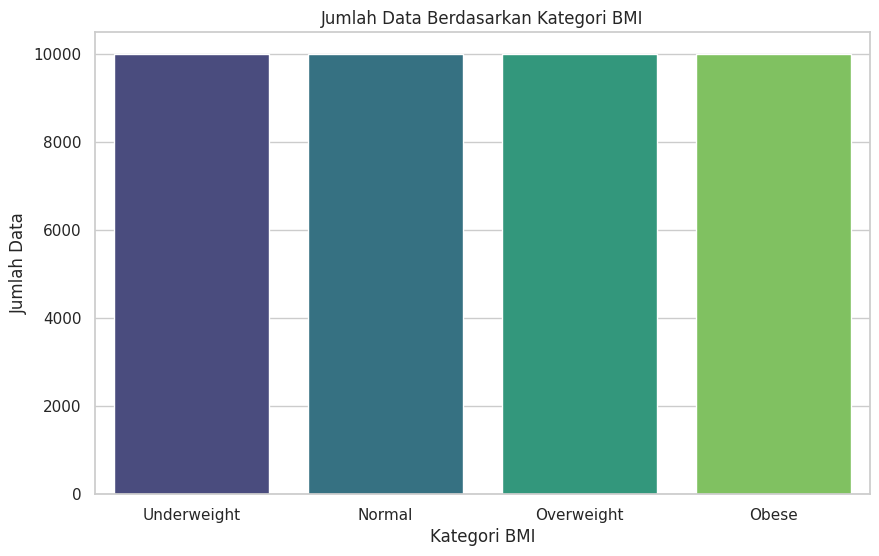

In [12]:
# Count plot for BMI categories
plt.figure(figsize=(10, 6))
# Access the BMI_Category column within the 'Input' dictionary
sns.countplot(x=df['Input'].apply(lambda x: x['BMI_Category']), palette="viridis")
plt.title("Jumlah Data Berdasarkan Kategori BMI")
plt.xlabel("Kategori BMI")
plt.ylabel("Jumlah Data")
plt.show()

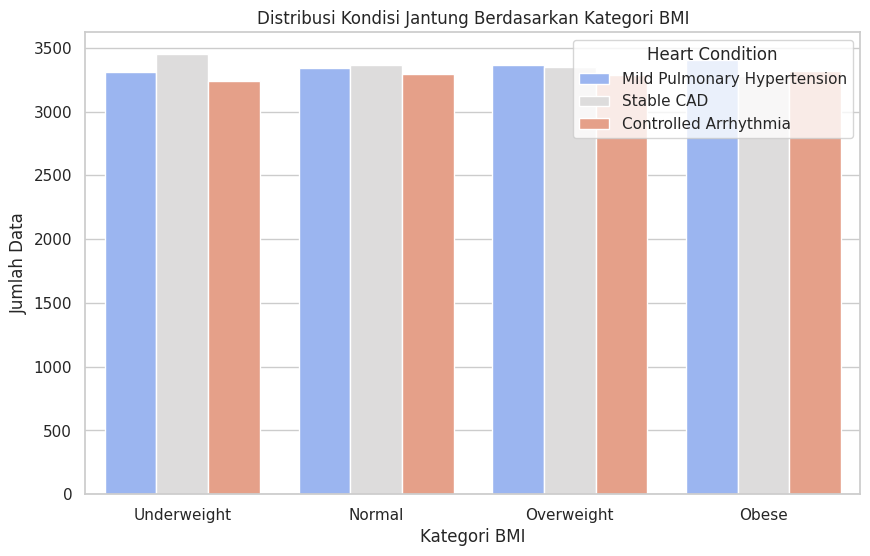

In [13]:
# Extract Heart Condition and BMI Category from Input for easier plotting
df['Heart_Condition'] = df['Input'].apply(lambda x: x['Heart_Condition'])
df['BMI_Category'] = df['Input'].apply(lambda x: x['BMI_Category'])

# Count plot for Heart Condition based on BMI Category
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI_Category', data=df, hue='Heart_Condition', palette="coolwarm")
plt.title("Distribusi Kondisi Jantung Berdasarkan Kategori BMI")
plt.xlabel("Kategori BMI")
plt.ylabel("Jumlah Data")
plt.legend(title="Heart Condition")
plt.show()

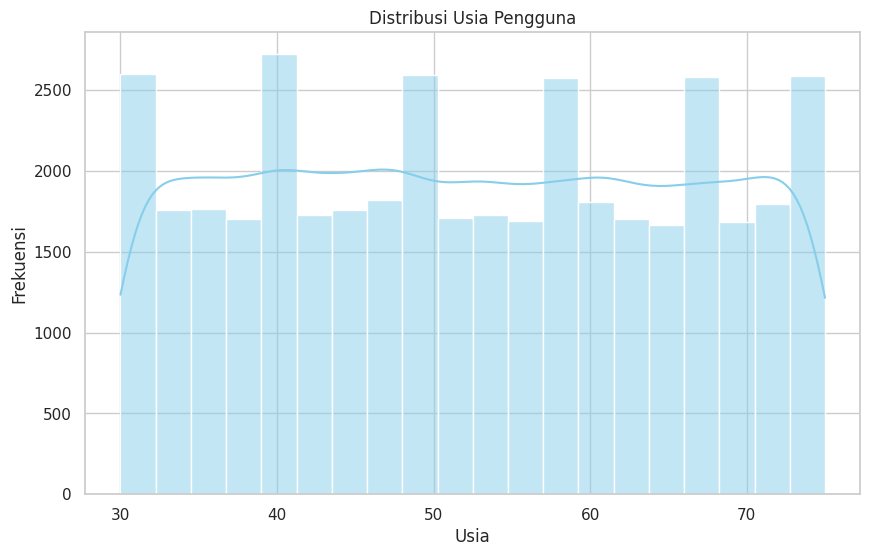

In [14]:
# Plot Age Distribution
df['Age'] = df['Input'].apply(lambda x: x['Age'])
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color="skyblue")
plt.title("Distribusi Usia Pengguna")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

<ipython-input-15-cd0b545d0981>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette="Set2")


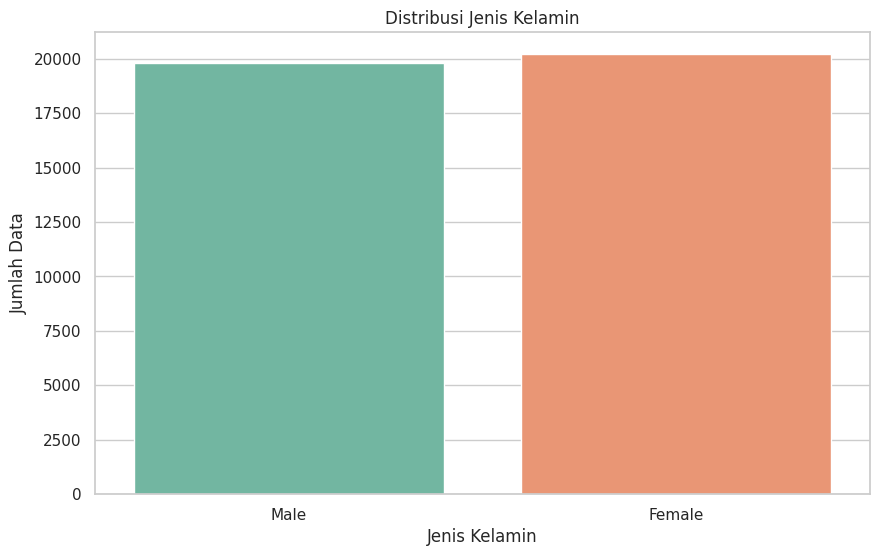

In [15]:
# Plot Gender Distribution
df['Gender'] = df['Input'].apply(lambda x: x['Gender'])
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, palette="Set2")
plt.title("Distribusi Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Data")
plt.show()

<ipython-input-16-ab14f8650825>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Activity_Preference', data=df, palette="magma")


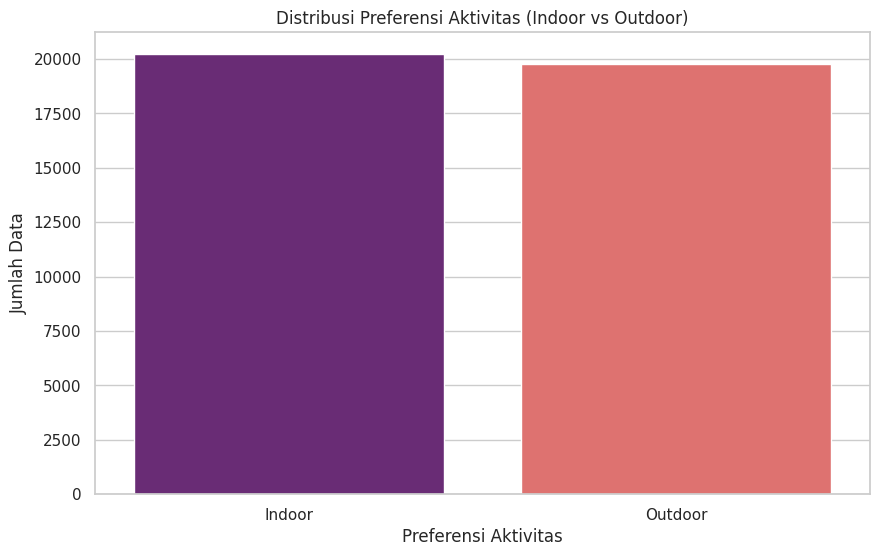

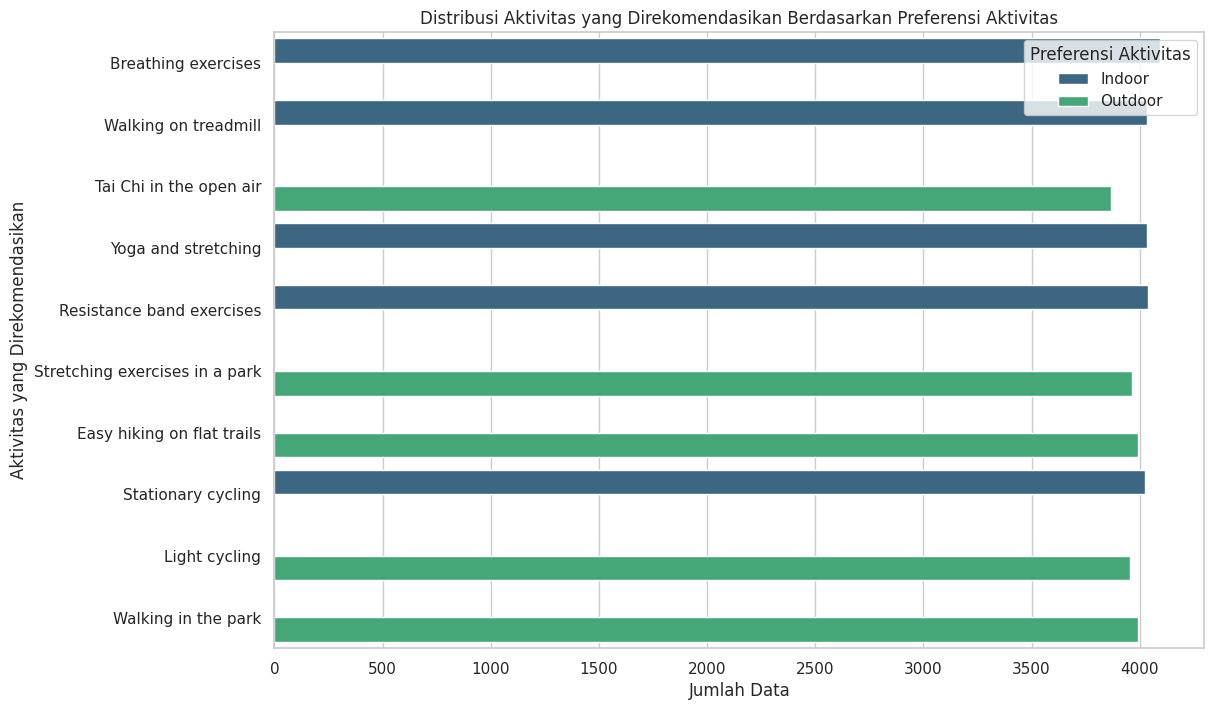

In [16]:
# 'Activity_Preference' dan 'Recommended_Activity' from 'Input' dan 'Target'
df['Activity_Preference'] = df['Input'].apply(lambda x: x.get('Activity_Preference', 'Unknown'))
df['Recommended_Activity'] = df['Target'].apply(lambda x: x.get('Recommended_Activity', 'Unknown'))

# (Indoor vs Outdoor)
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity_Preference', data=df, palette="magma")
plt.title("Distribusi Preferensi Aktivitas (Indoor vs Outdoor)")
plt.xlabel("Preferensi Aktivitas")
plt.ylabel("Jumlah Data")
plt.show()

# Plot recommended acitivity
plt.figure(figsize=(12, 8))
sns.countplot(y='Recommended_Activity', data=df, hue='Activity_Preference', dodge=True, palette="viridis")
plt.title("Distribusi Aktivitas yang Direkomendasikan Berdasarkan Preferensi Aktivitas")
plt.xlabel("Jumlah Data")
plt.ylabel("Aktivitas yang Direkomendasikan")
plt.legend(title="Preferensi Aktivitas")
plt.show()
